In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.shape



(1599, 12)

In [18]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We have some outliers 
1. residual sugar
2. free sulfur dioxide
3. total sulfur dioxide

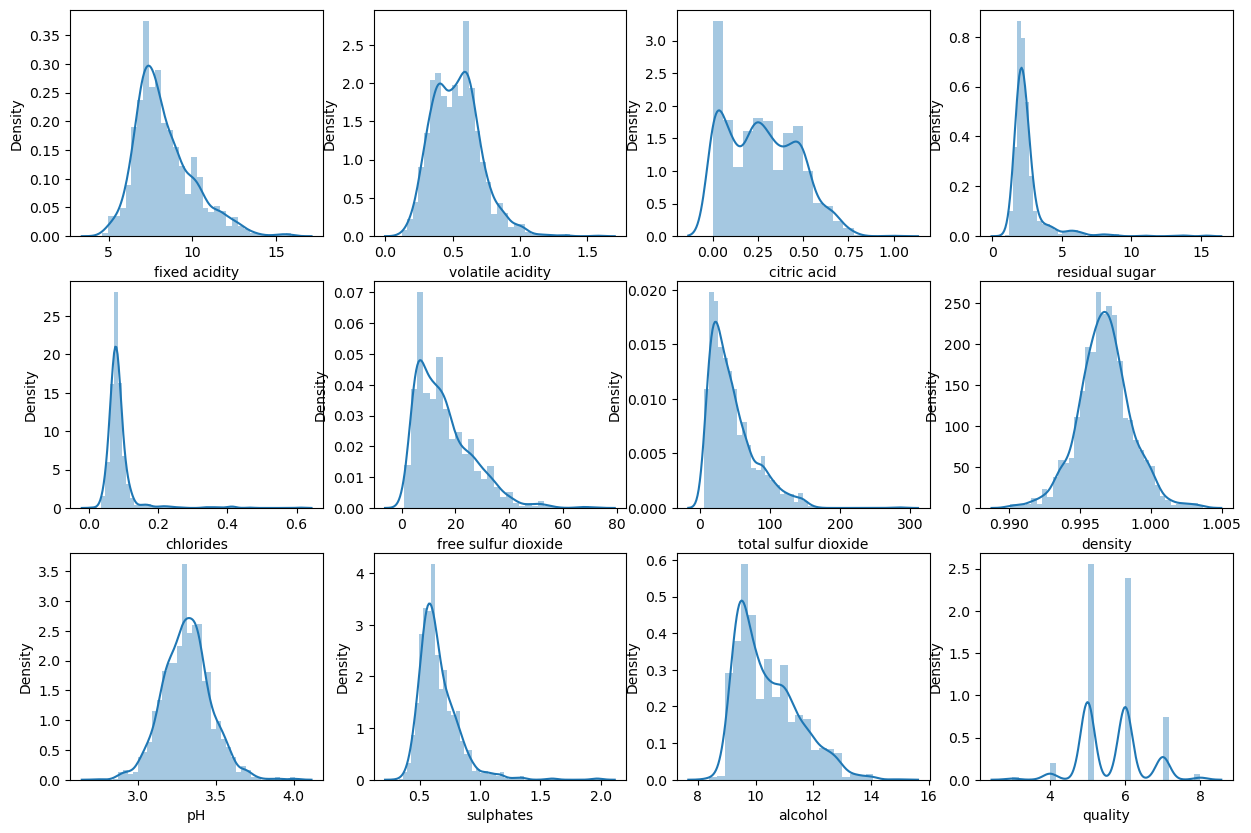

In [21]:
plt.figure(figsize = (15,10))
plotnumber=1
for columns in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show()    

In [22]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


While check the distibution I found multiple columns with skewness

1. volatile acidity
2. residual sugar
3. chlorides
4. free sulfur dioxide
5. total sulfur dioxide
6. sulphates
7. alcohol

Using Z distibution for Outliers

In [23]:
from scipy.stats import zscore
z_score = zscore(df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)
filtering_data = (abs_z_score<2.3).all(axis=1)
df=df[filtering_data]

In [24]:
df.shape

(1257, 12)

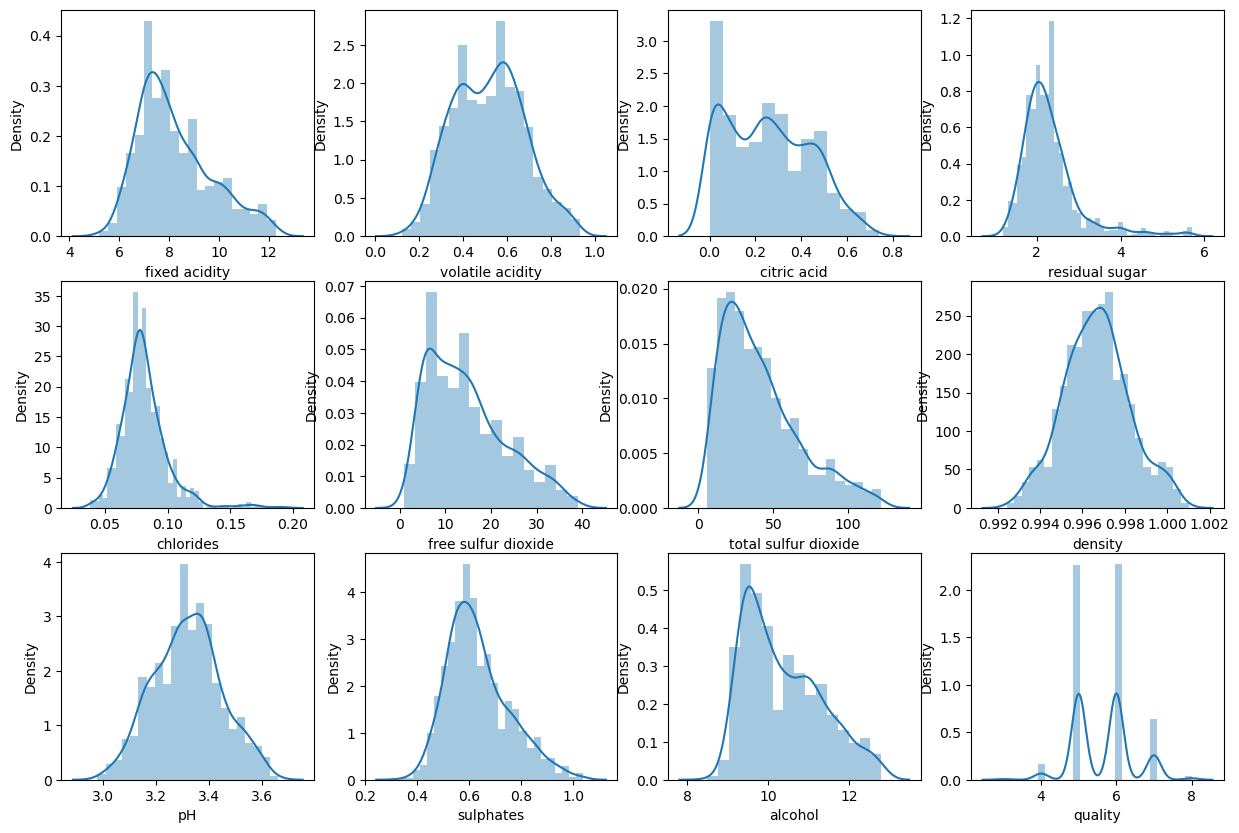

In [25]:
plt.figure(figsize = (15,10))
plotnumber=1
for columns in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns)
    plotnumber+=1
plt.show() 

In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,8.227208,0.518496,0.255736,2.308473,0.081283,14.672235,41.472554,0.996666,3.319682,0.635521,10.370114,5.644391
std,1.477035,0.160965,0.183761,0.688065,0.018987,8.575859,26.010246,0.001565,0.127984,0.119910,0.954455,0.768634
min,5.200000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992420,2.980000,0.330000,8.500000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.230000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996660,3.320000,0.620000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.089000,20.000000,55.000000,0.997600,3.400000,0.700000,11.000000,6.000000
max,12.300000,0.935000,0.740000,5.700000,0.194000,39.000000,122.000000,1.001000,3.660000,1.040000,12.800000,8.000000


In [27]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3-q1

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
high_chlorides = q3.chlorides+(1.5*iqr.chlorides)

index_chlorides=np.where(df['chlorides']>high_chlorides)
print(index_chlorides)

(array([  91,   93,   97,  225,  243,  246,  247,  251,  255,  256,  273,
        278,  301,  307,  330,  375,  403,  407,  408,  449,  455,  456,
        466,  568,  569,  572,  586,  597,  618,  619,  626,  661,  689,
        724,  774,  778,  779,  851,  879,  884,  886,  912,  914,  927,
        939,  940,  966,  971,  972, 1030, 1064, 1105, 1116, 1238],
      dtype=int64),)


In [30]:
df = df.drop(df.index[index_chlorides])
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1199,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1200,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1201,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [31]:
high_sulphates = q3.sulphates+(1.5*iqr.sulphates)

index_sulphates=np.where(df['sulphates']>high_sulphates)
print(index_sulphates)

(array([  54,   83,   87,  141,  177,  181,  197,  199,  203,  213,  251,
        261,  265,  354,  356,  408,  429,  434,  679, 1041, 1042, 1044,
       1059, 1130, 1136], dtype=int64),)


In [32]:
df = df.drop(df.index[index_sulphates])
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1174,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1175,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1176,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
high_density = q3.density+(1.5*iqr.density)

index_density=np.where(df['density']>high_density)
print(index_density)

(array([312, 424], dtype=int64),)


In [34]:
df = df.drop(df.index[index_density])
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1172,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1173,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1174,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


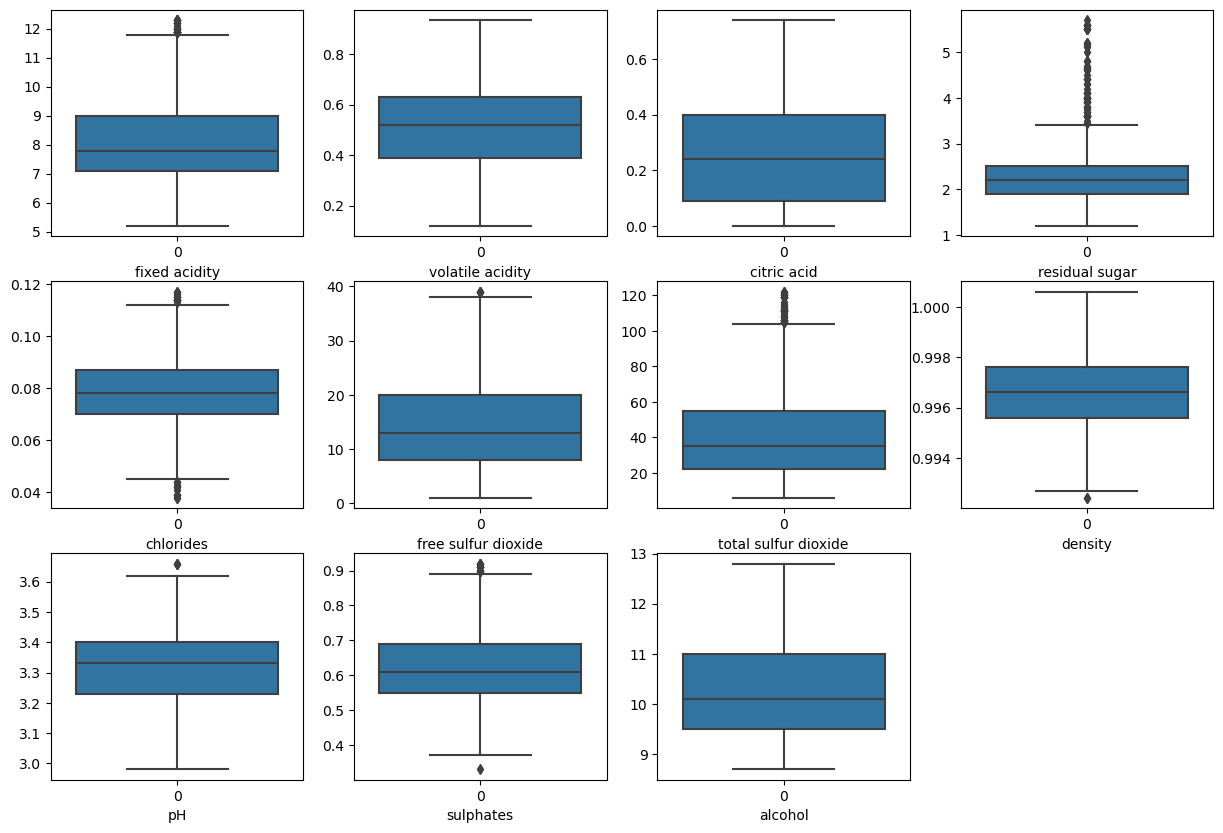

In [35]:
data_features = df.drop(columns=['quality'],axis=1)

plt.figure(figsize = (15,10))
plotnumber=1
for i in data_features:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(data = df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show() 

In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,8.163435,0.520323,0.250451,2.288095,0.078580,14.796769,41.840136,0.996609,3.322330,0.625689,10.355130,5.642007
std,1.426947,0.159477,0.180210,0.657308,0.013898,8.520335,26.268401,0.001545,0.126793,0.109549,0.954181,0.764246
min,5.200000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992420,2.980000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.000000,0.995567,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.200000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997600,3.400000,0.690000,11.000000,6.000000
max,12.300000,0.935000,0.740000,5.700000,0.117000,39.000000,122.000000,1.000600,3.660000,0.920000,12.800000,8.000000


In [37]:
df.shape

(1176, 12)

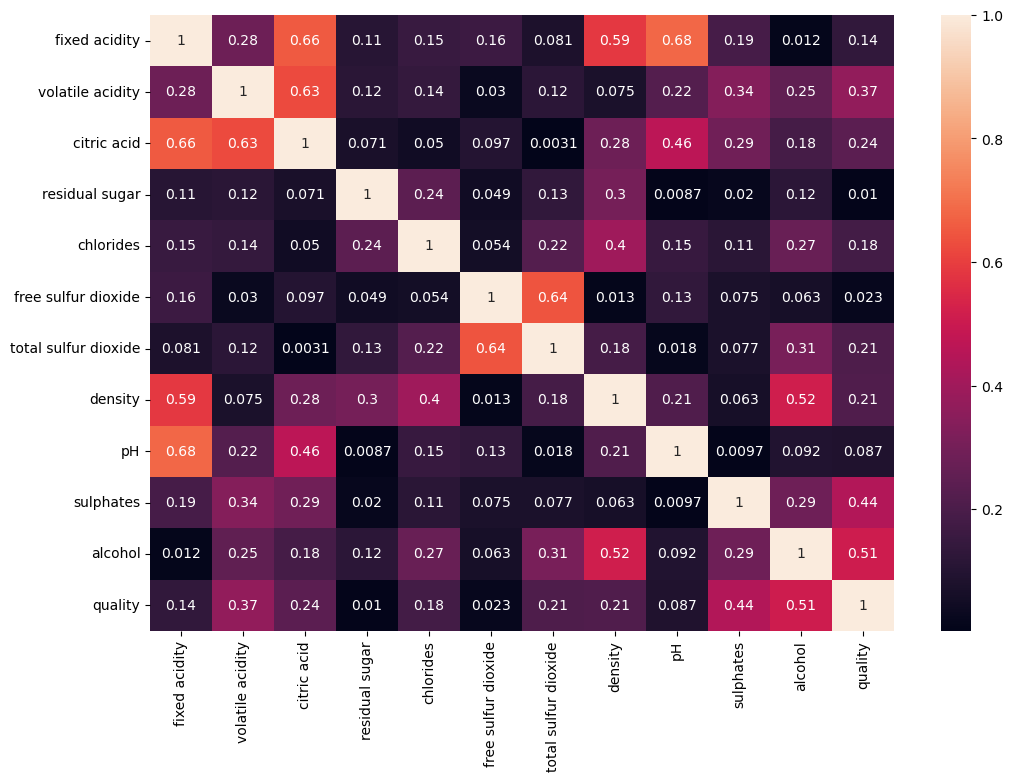

In [38]:
df_corr = df.corr().abs()

plt.figure(figsize =(12,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [39]:
x = df.drop(columns=['quality'],axis= 1)
y= df.quality

In [40]:
from sklearn.feature_selection import SelectKBest,f_classif

In [41]:
best_features = SelectKBest(score_func=f_classif, k=9)
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_column = pd.DataFrame(x.columns)

#Concate DataFrame
featrue_score = pd.concat([df_column,df_score],axis=1)
featrue_score.columns = ['feature_name','score']

print(featrue_score.nlargest(9,'score'))

            feature_name      score
10               alcohol  94.815729
9              sulphates  58.285293
1       volatile acidity  38.176015
6   total sulfur dioxide  21.105142
2            citric acid  16.734033
7                density  12.614287
4              chlorides   9.275354
0          fixed acidity   5.926701
5    free sulfur dioxide   4.850265


In [42]:
new_x = df[['alcohol','sulphates','volatile acidity','total sulfur dioxide','citric acid','density','chlorides',
           'fixed acidity','free sulfur dioxide']]
new_x

,alcohol,sulphates,volatile acidity,total sulfur dioxide,citric acid,density,chlorides,fixed acidity,free sulfur dioxide
0,9.4,0.56,0.700,34.0,0.00,0.99780,0.076,7.4,11.0
1,9.8,0.68,0.880,67.0,0.00,0.99680,0.098,7.8,25.0
2,9.8,0.65,0.760,54.0,0.04,0.99700,0.092,7.8,15.0
3,9.8,0.58,0.280,60.0,0.56,0.99800,0.075,11.2,17.0
4,9.4,0.56,0.700,34.0,0.00,0.99780,0.076,7.4,11.0
...,...,...,...,...,...,...,...,...,...
1594,10.5,0.58,0.600,44.0,0.08,0.99490,0.090,6.2,32.0
1595,11.2,0.76,0.550,51.0,0.10,0.99512,0.062,5.9,39.0
1596,11.0,0.75,0.510,40.0,0.13,0.99574,0.076,6.3,29.0
1597,10.2,0.71,0.645,44.0,0.12,0.99547,0.075,5.9,32.0


In [43]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(new_x)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=234)

In [45]:
def metric_score(cif,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = cif.predict(x_train)
        print(f'==================Train Data Score=============')
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)}")
              
    elif train ==False:
        pred = cif.predict(x_test)
        print(f'==================Tr Data Score=============')
        print(f"Accuracy Score : {accuracy_score(y_test,pred)}")
        print('Classification Report :',(classification_report(y_test,pred,digits=2))) 

In [46]:
lr = DecisionTreeClassifier()
lr.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
metric_score(lr,x_train,x_test,y_train,y_test, train=True)
metric_score(lr,x_train,x_test,y_train,y_test, train=False)

==================Train Data Score=============
Accuracy Score : 1.0
==================Tr Data Score=============
Accuracy Score : 0.6271186440677966
Classification Report :               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           5       0.67      0.69      0.68        97
           6       0.66      0.59      0.63       103
           7       0.56      0.65      0.60        31
           8       0.00      0.00      0.00         3

    accuracy                           0.63       236
   macro avg       0.31      0.32      0.32       236
weighted avg       0.64      0.63      0.63       236



In [52]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
             'criterion':['gini','entropy'],
             'max_depth':range(5,100),
             'min_samples_leaf' :range(2,4),
             'min_samples_split' : range(3,8),
             'max_leaf_nodes':range(5,10)}

In [66]:
grid_search = GridSearchCV(estimator = dt,
                         param_grid =param_grid,cv=5,n_jobs=-1 )

In [67]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 100),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 8)})

In [69]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [70]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=5,min_samples_leaf=2,min_samples_split=3)

dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=3)

In [71]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

==================Train Data Score=============
Accuracy Score : 0.6202127659574468
==================Tr Data Score=============
Accuracy Score : 0.576271186440678
Classification Report :               precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.64      0.71      0.68        97
           6       0.57      0.50      0.53       103
           7       0.41      0.52      0.46        31
           8       0.00      0.00      0.00         3

    accuracy                           0.58       236
   macro avg       0.32      0.34      0.33       236
weighted avg       0.57      0.58      0.57       236

